# Instagram Fake / Spammer / Genuine Account Classification
**Project:** Instagram Fake Spammer Genuine Accounts — End-to-end analytics & ML notebook  
**Tools:** Python, scikit-learn, pandas, matplotlib, seaborn, joblib, SQL (optional), Tableau (optional)  
**Purpose:** Load the dataset (`train.csv`, `test.csv`), perform EDA, preprocess, engineer features, train several ML models, tune them, evaluate, save best model, and export predictions.  
**How to use:** put `train.csv` and `test.csv` in the same folder as this notebook and run all cells in order.



In [289]:
# =========================
# 1. Import Libraries
# =========================
import sys, os
print("Python version:", sys.version)
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
sns.set_style('whitegrid')

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


In [290]:
# =========================
# 2. File Paths (Change if needed)
# =========================
train_path = "D:\\Instagram-fake-spammer-genuine-accounts\\data\\train.csv"
test_path = "D:\\Instagram-fake-spammer-genuine-accounts\\data\\test.csv"


In [291]:
# =========================
# 3. Load Dataset
# =========================
print("Loading datasets...")
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

Loading datasets...


In [292]:
print("\nTrain dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)
print("\nFirst 5 rows of training data:\n", train_df.head())


Train dataset shape: (576, 12)
Test dataset shape: (120, 12)

First 5 rows of training data:
    profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   

In [293]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [294]:
train_df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [295]:
# =========================
# 4. Basic Info and Cleaning
# =========================
print("\nChecking for missing values:")
print(train_df.isnull().sum())


Checking for missing values:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [296]:
train_df['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [297]:
train_df.nunique()

profile pic               2
nums/length username     54
fullname words            9
nums/length fullname     25
name==username            2
description length      104
external URL              2
private                   2
#posts                  193
#followers              372
#follows                400
fake                      2
dtype: int64

In [298]:
train_df.corr()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
profile pic,1.000000,-0.364087,0.213295,-0.131756,-0.124903,0.367892,0.236729,0.114732,0.169570,0.061137,0.194833,-0.637315
nums/length username,-0.364087,1.000000,-0.225472,0.408567,0.056890,-0.321170,-0.237125,-0.063713,-0.157442,-0.062785,-0.172413,0.587687
fullname words,0.213295,-0.225472,1.000000,-0.094348,-0.082969,0.272522,0.196562,-0.089070,0.073350,0.033225,0.094855,-0.298793
nums/length fullname,-0.131756,0.408567,-0.094348,1.000000,0.291149,-0.117521,-0.088724,-0.030030,-0.057716,-0.027035,-0.067971,0.246782
name==username,-0.124903,0.056890,-0.082969,0.291149,1.000000,-0.064814,-0.039232,0.046084,-0.049808,-0.017761,-0.009529,0.170695
description length,0.367892,-0.321170,0.272522,-0.117521,-0.064814,1.000000,0.482313,-0.110329,0.144824,0.005929,0.226561,-0.460825
external URL,0.236729,-0.237125,0.196562,-0.088724,-0.039232,0.482313,1.000000,-0.162612,0.165008,0.027189,0.142519,-0.362809
private,0.114732,-0.063713,-0.089070,-0.030030,0.046084,-0.110329,-0.162612,1.000000,-0.087495,-0.073473,-0.057542,-0.028586
#posts,0.169570,-0.157442,0.073350,-0.057716,-0.049808,0.144824,0.165008,-0.087495,1.000000,0.321385,0.098225,-0.245355
#followers,0.061137,-0.062785,0.033225,-0.027035,-0.017761,0.005929,0.027189,-0.073473,0.321385,1.000000,-0.011066,-0.093689


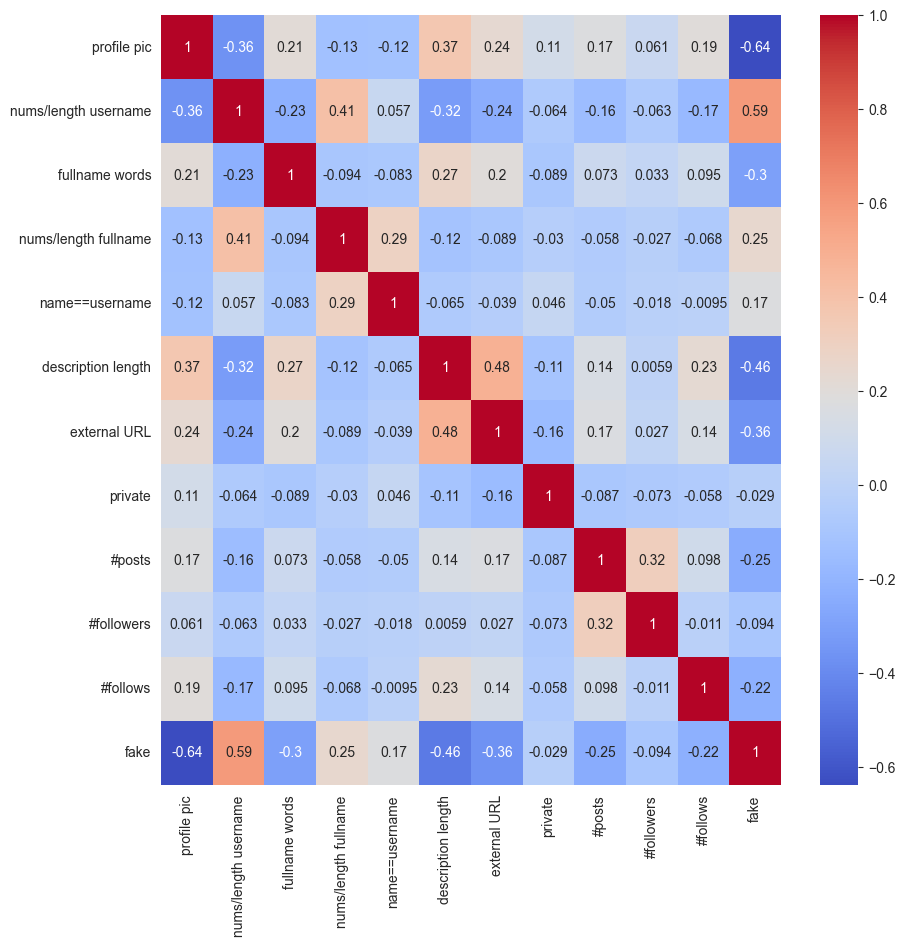

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

plt.show()

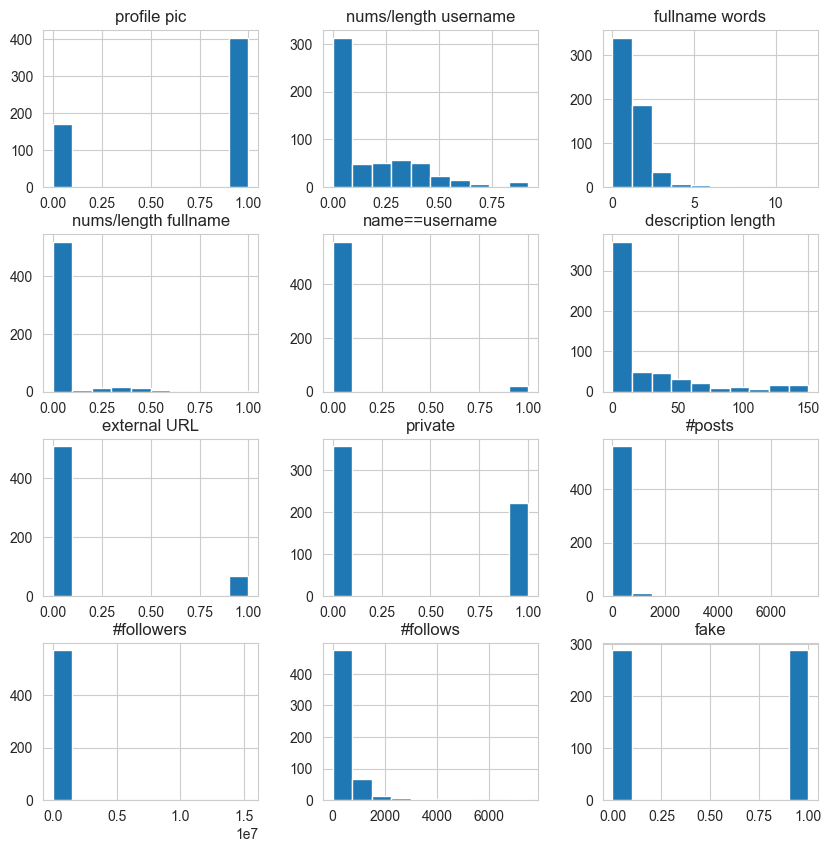

In [300]:
train_df.hist(figsize=(10,10))
plt.show()

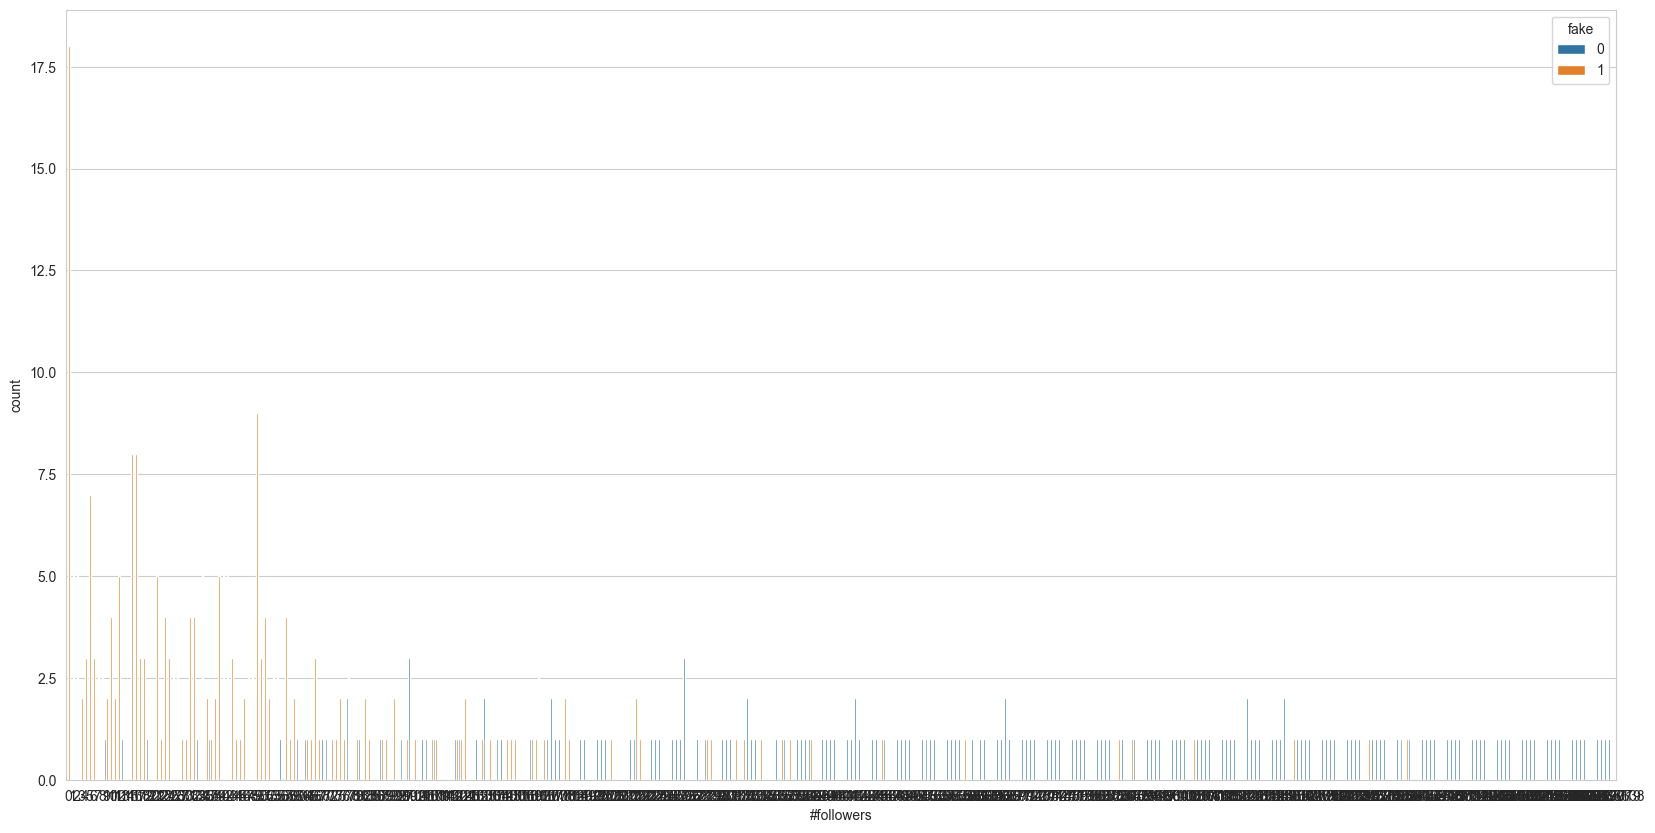

In [301]:
plt.figure(figsize=(20,10))
sns.countplot(x='#followers', hue='fake', data=train_df)
plt.show()


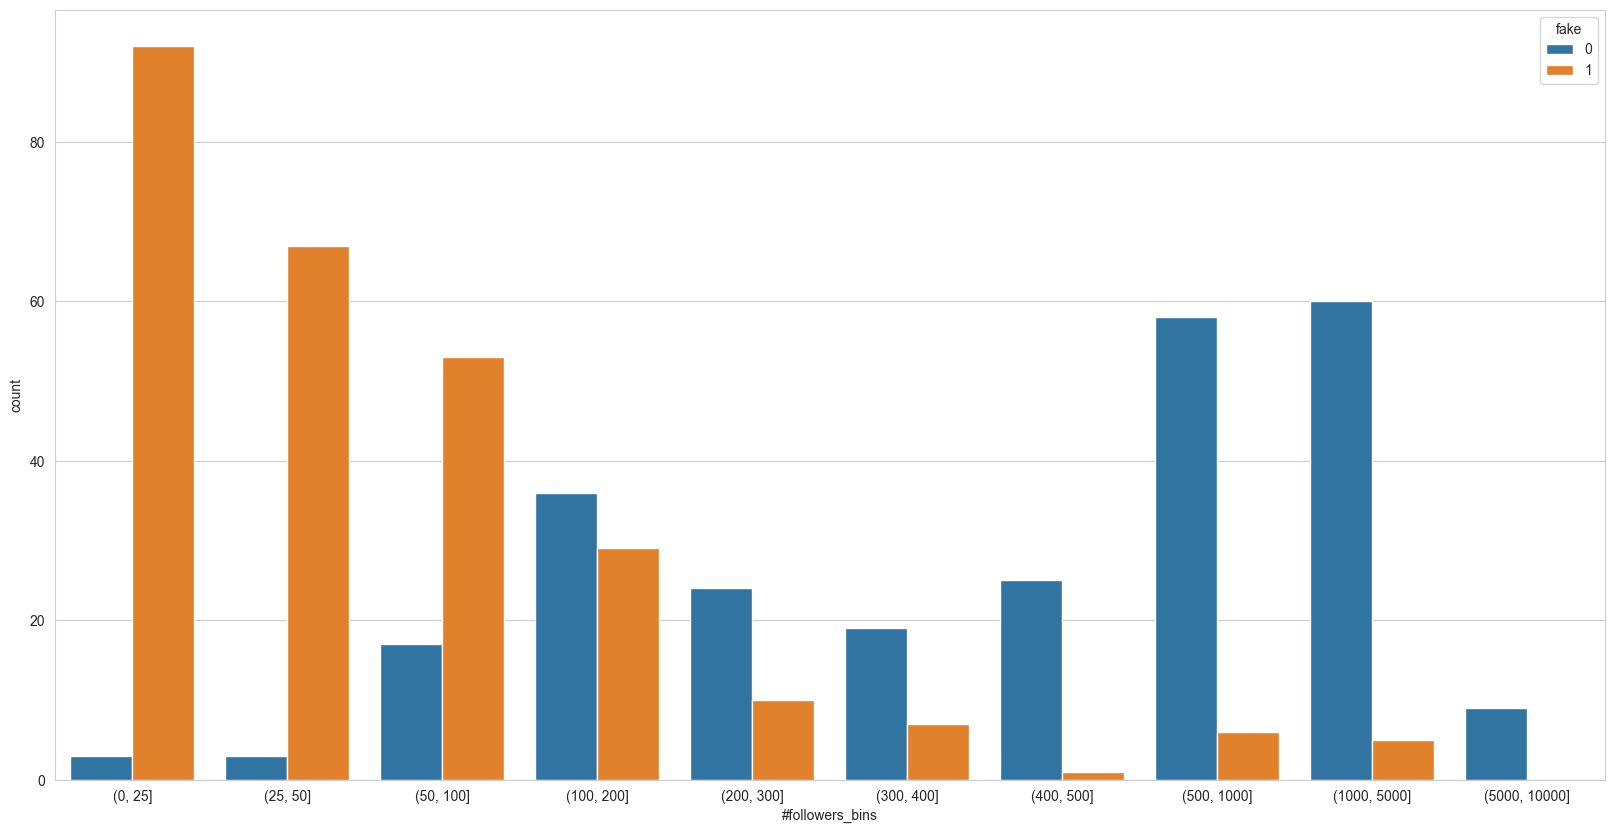

In [302]:
# create bins for #followers column
bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 5000, 10000]

# cut the #followers column into the bins
train_df['#followers_bins'] = pd.cut(train_df['#followers'],
bins=bins)

# plot #followers with bins and show fake value counts
plt.figure(figsize=(20,10))

sns.countplot(x='#followers_bins', hue='fake', data=train_df)
plt.show()

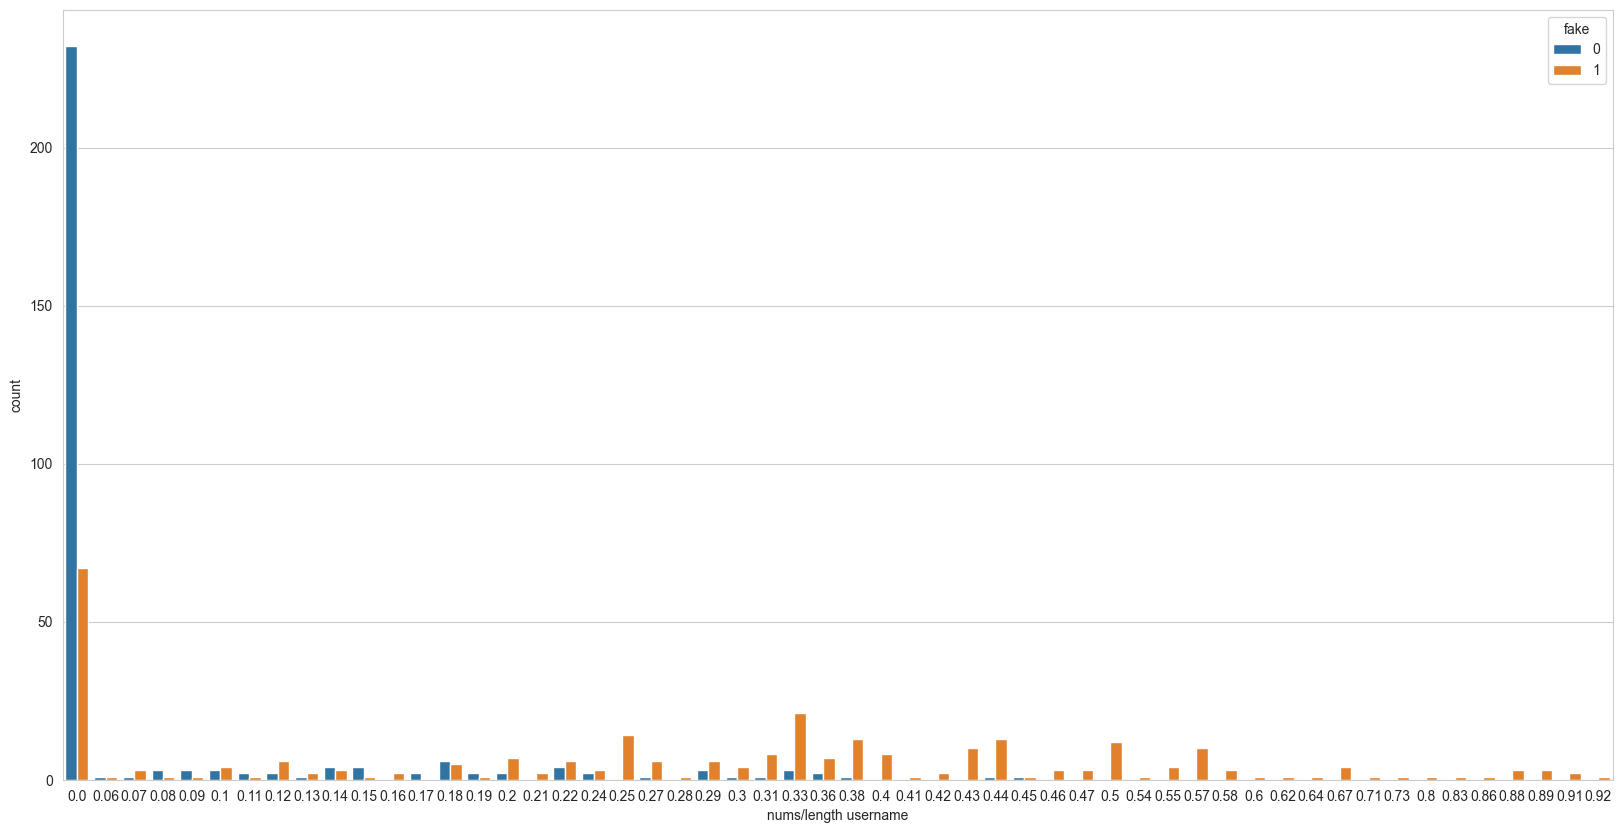

In [303]:
# plot nums/length username and show fake value counts
plt.figure(figsize=(20,10))
sns.countplot(x='nums/length username', hue='fake', data=train_df)
plt.show()

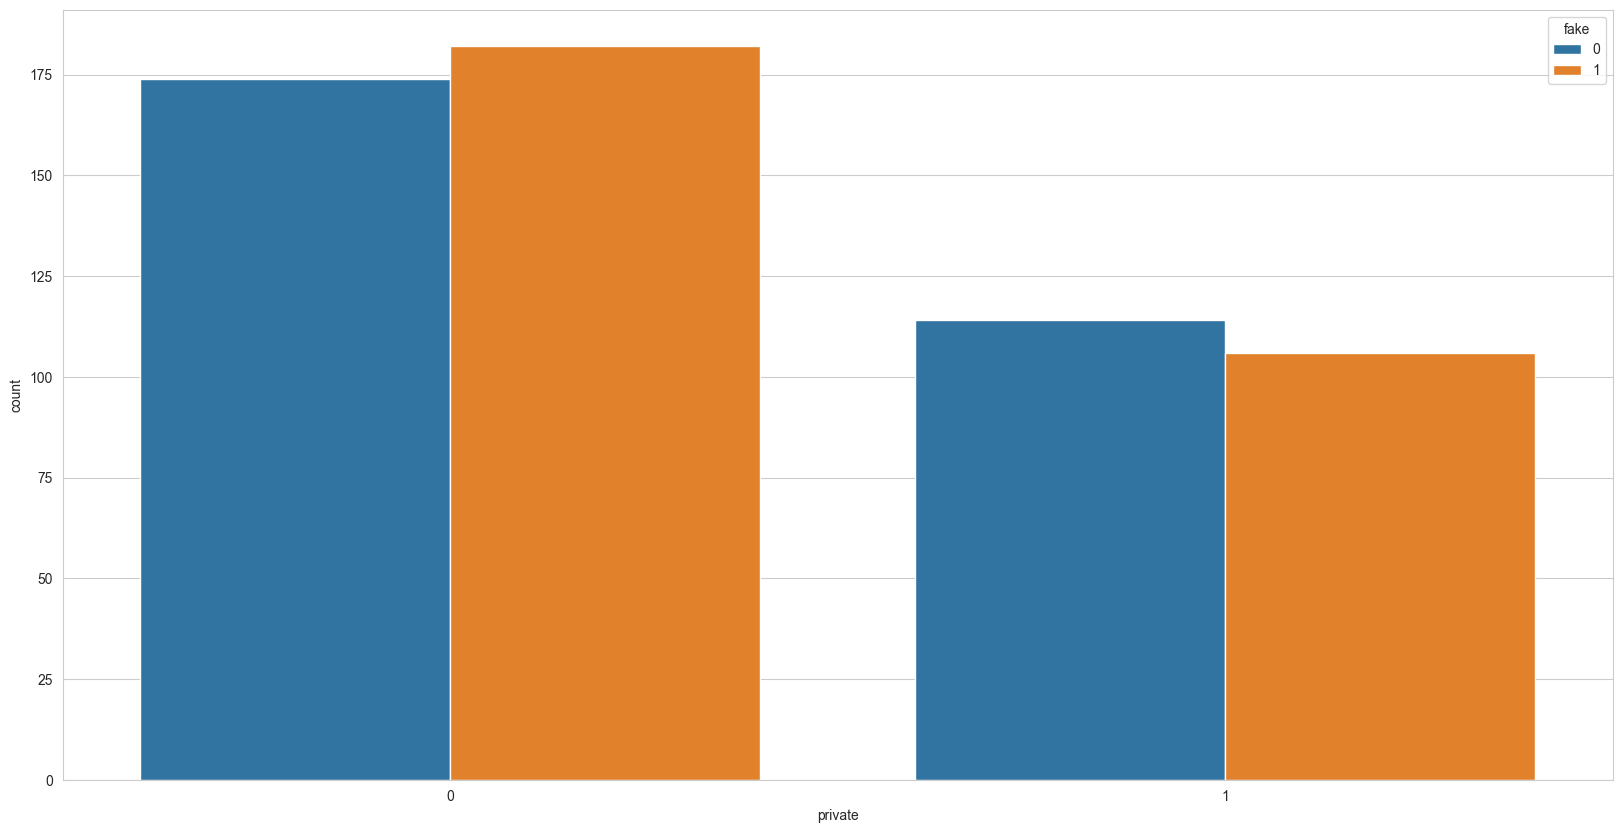

In [304]:
# how is fake distributed amongst private accounts
plt.figure(figsize=(20,10))
sns.countplot(x='private', hue='fake', data=train_df)
plt.show()

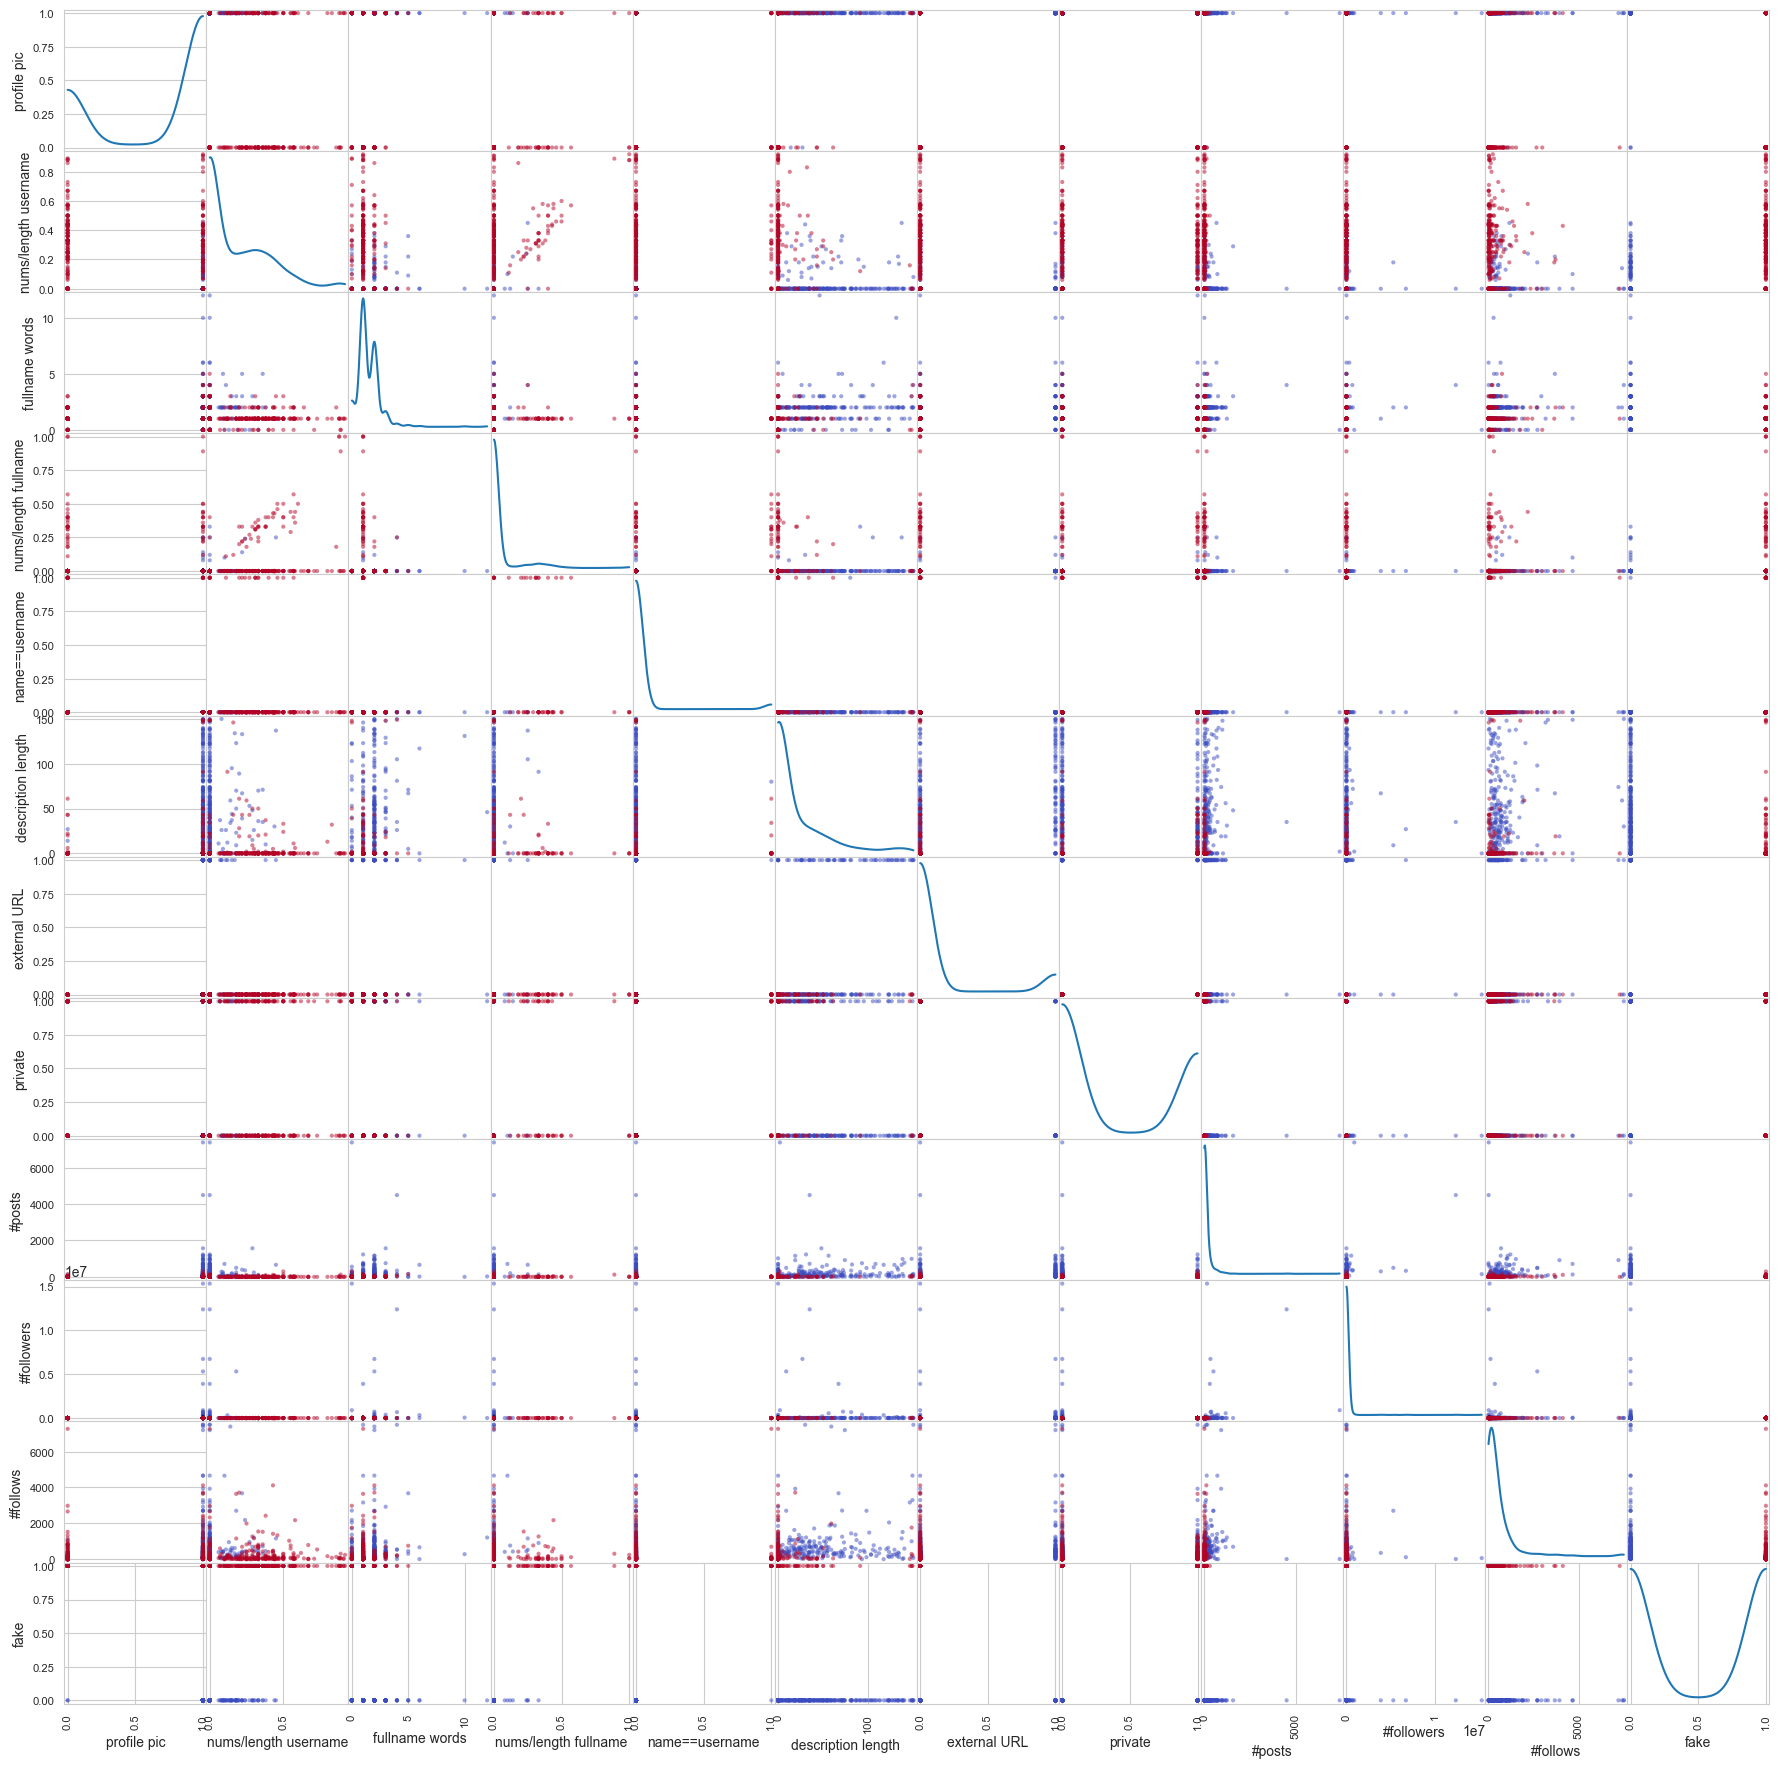

In [305]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df, figsize=(22,22), diagonal='kde',
c=train_df['fake'], cmap='coolwarm')

plt.show()

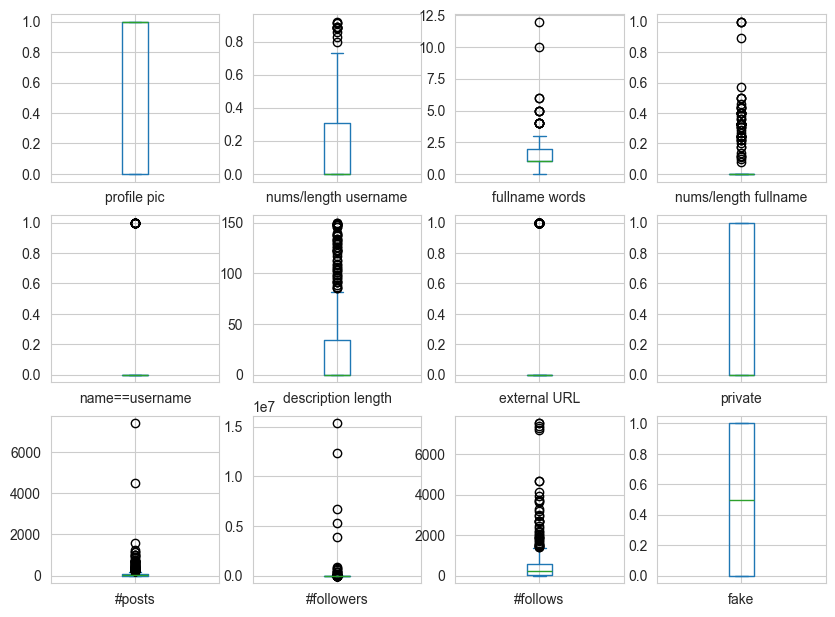

In [306]:
train_df.plot(kind='box', subplots=True, layout=(4,4),
figsize=(10,10))

plt.show()

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [308]:
from sklearn.tree import DecisionTreeClassifier

X = train_df.drop(['#followers_bins', 'fake'], axis=1)
y = train_df['fake']

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)


model = DecisionTreeClassifier()


print(X_train.dtypes)
print(y_train.dtypes)

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
dtype: object
int64


In [309]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [310]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8793103448275862

In [311]:
confusion_matrix(y_test, y_pred)

array([[57,  6],
       [ 8, 45]])

In [312]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        63
           1       0.88      0.85      0.87        53

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116



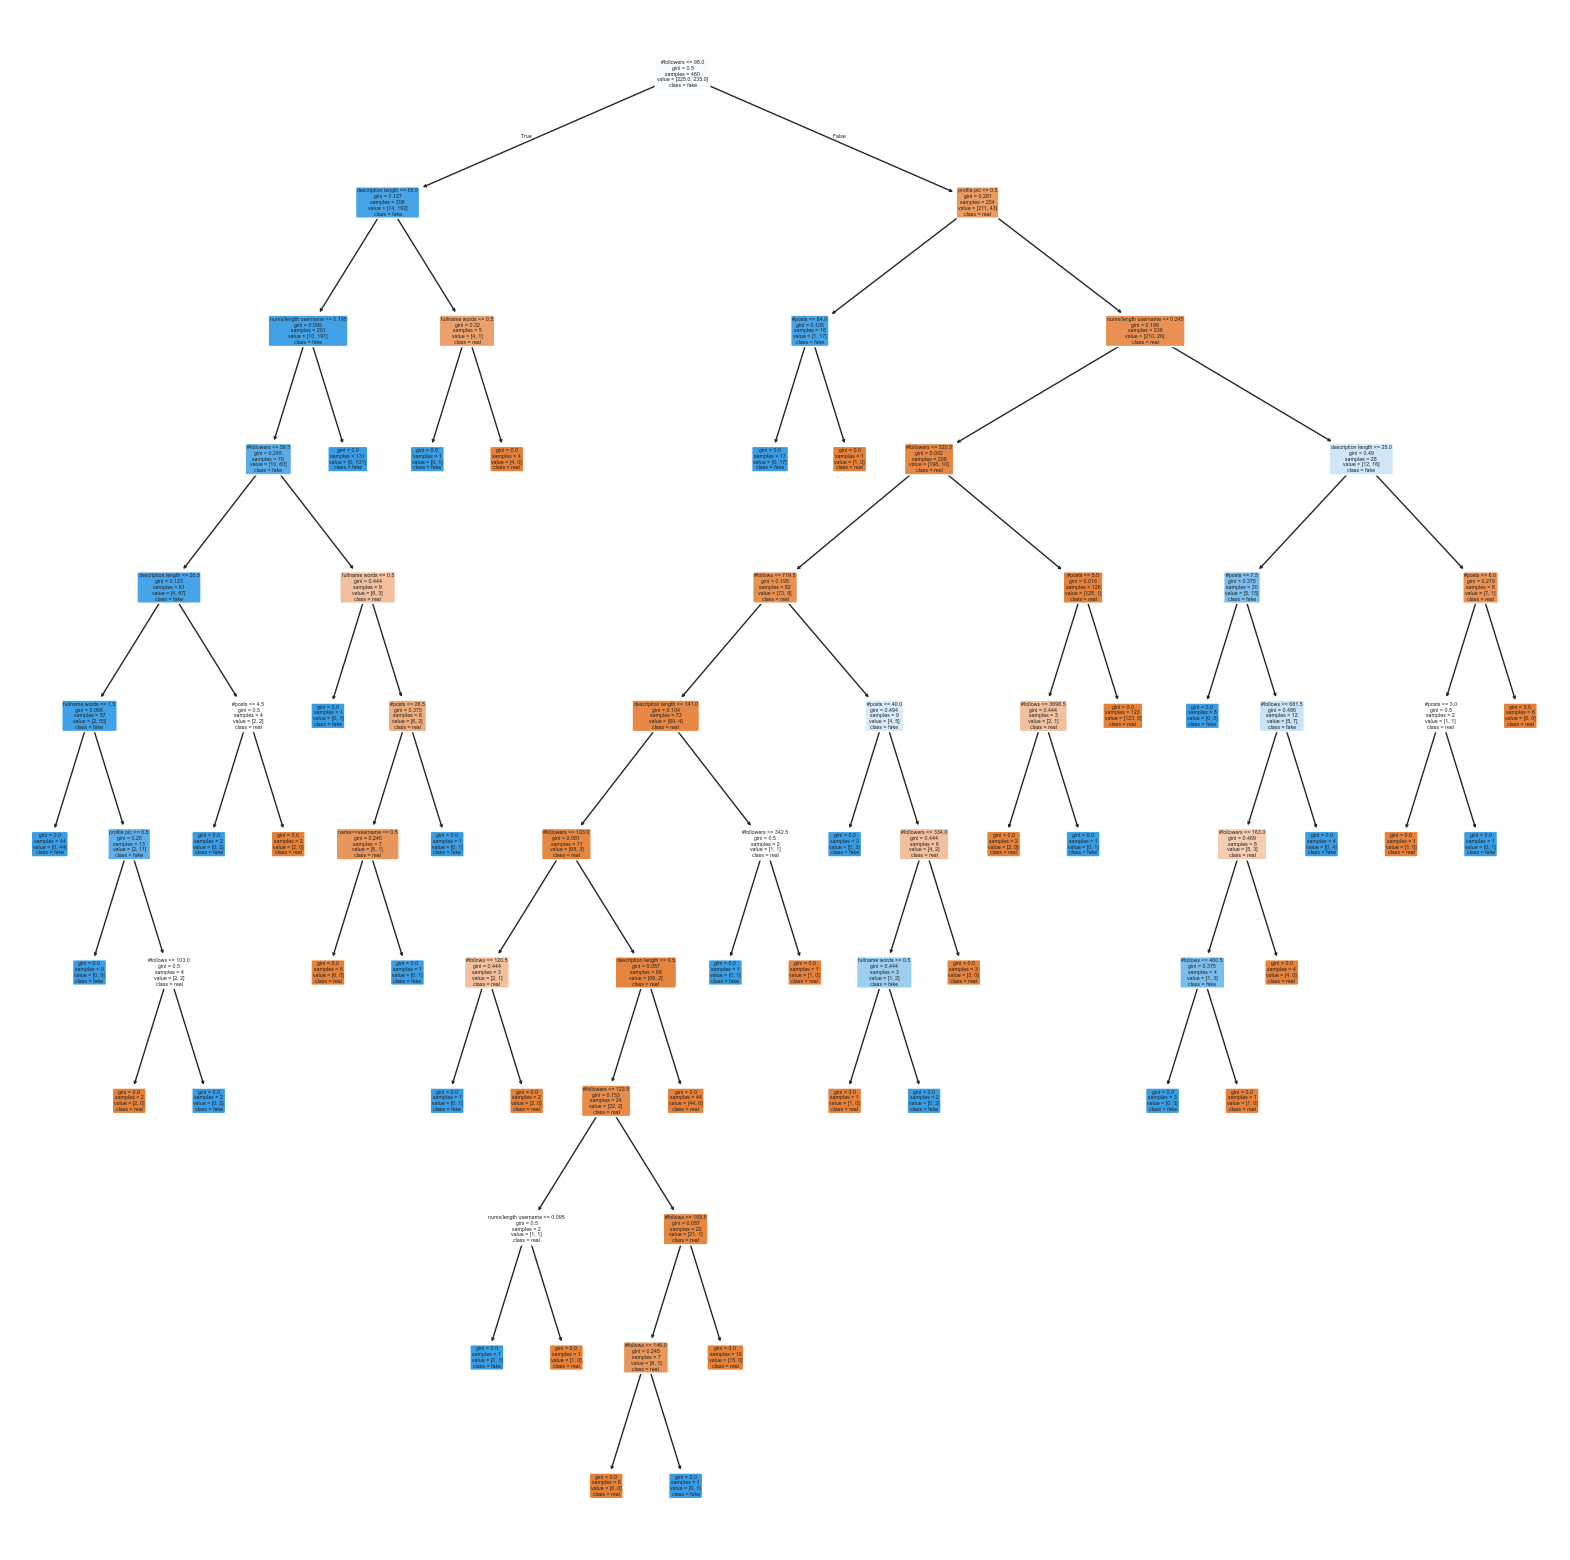

In [313]:
# explain model with tree plot
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, feature_names=X.columns,
class_names=['real', 'fake'], rounded=True)

plt.show()

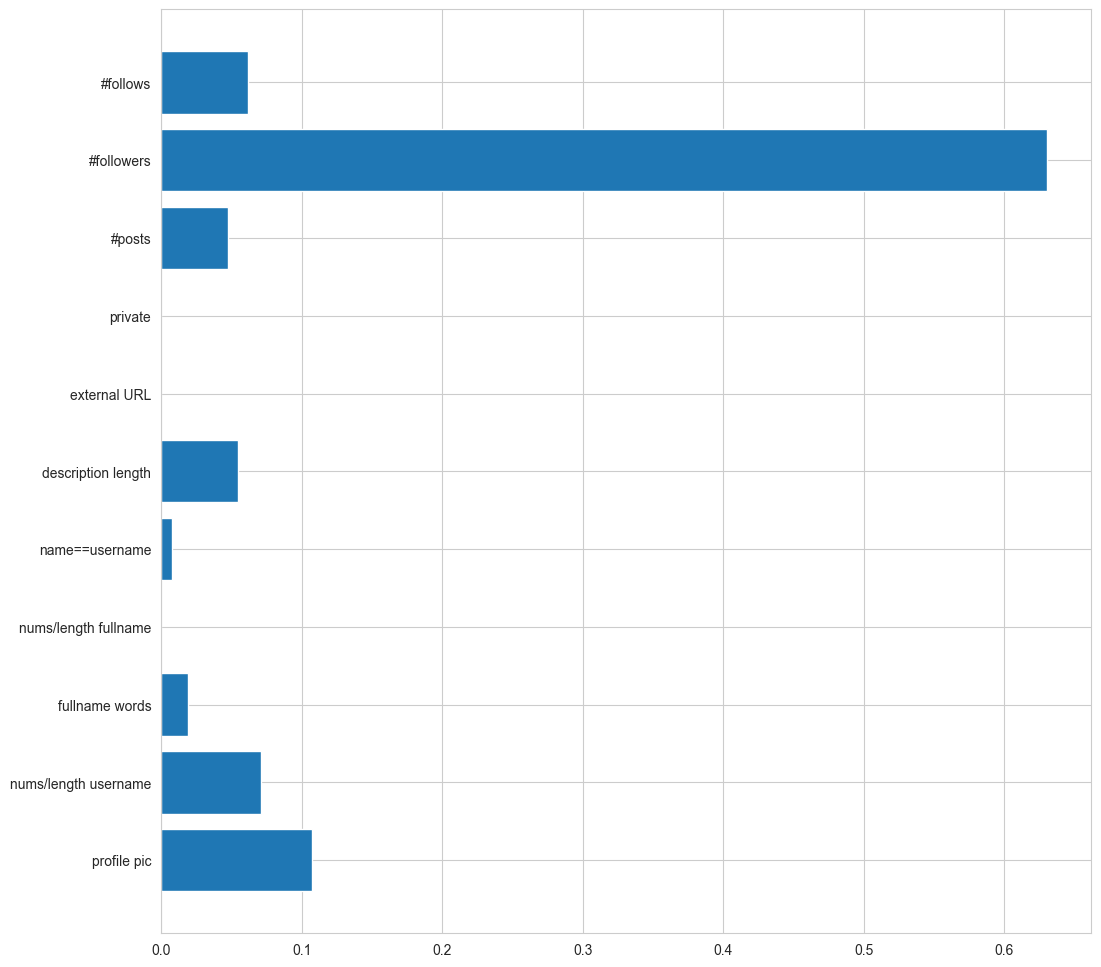

In [314]:
model.feature_importances_

# plot feature importance
plt.figure(figsize=(12,12))

plt.barh(X.columns, model.feature_importances_)
plt.show()

In [278]:
# # =========================
# # 6. Define Features and Target
# # =========================
# target = 'fake'
# X = train_df.drop(columns=[target])
# y = train_df[target]

In [279]:
# # Split data
# X_train, X_valid, y_train, y_valid = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

In [280]:
# # =========================
# # 7. EDA Visualization
# # =========================
# print("\nGenerating EDA plots...")

In [281]:
# plt.figure(figsize=(6, 4))
# sns.countplot(x=y)
# plt.title("Fake vs Genuine Account Distribution")
# plt.show()

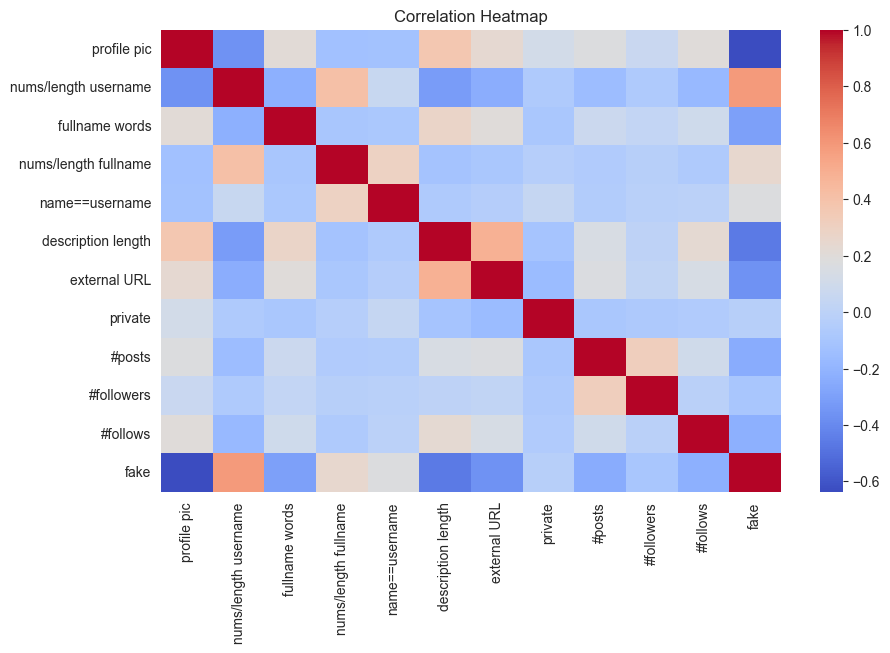

In [315]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [283]:
# # Ensure all columns are numeric
# for df in [X_train, X_valid]:
#     for col in df.columns:
#         if pd.api.types.is_categorical_dtype(df[col]):
#             df[col] = df[col].cat.codes
#         elif not np.issubdtype(df[col].dtype, np.number):
#             df[col] = df[col].astype('category').cat.codes

# # =========================
# # 8. Model Training & Comparison
# # =========================
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42)
# }

# results = {}

# for name, model in models.items():
#     pipe = Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', model)
#     ])
#     pipe.fit(X_train, y_train)
#     preds = pipe.predict(X_valid)
#     acc = accuracy_score(y_valid, preds)
#     results[name] = acc
#     print(f"\n{name} Accuracy: {acc:.4f}")
#     print(classification_report(y_valid, preds))

# best_model_name = max(results, key=results.get)
# print(f"\nBest Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")

In [284]:
# # =========================
# # 9. Retrain Best Model on Full Data (Fixed)
# # =========================

# # Ensure full dataset X has only numeric columns
# for col in X.columns:
#     if pd.api.types.is_categorical_dtype(X[col]):
#         X[col] = X[col].cat.codes
#     elif not np.issubdtype(X[col].dtype, np.number):
#         X[col] = X[col].astype('category').cat.codes

# # Replace NaN / Inf
# X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# # Retrain best model on full clean data
# best_model = models[best_model_name]
# final_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf', best_model)
# ])

# print(f"\nRetraining best model ({best_model_name}) on full data...")
# final_pipe.fit(X, y)
# print("Model retraining completed successfully!")


In [316]:
test_df =pd.read_csv("D:\\Instagram-fake-spammer-genuine-accounts\\data\\test.csv")


In [317]:
test_df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [318]:
# Align test_df columns with training features
missing_cols = set(X.columns) - set(test_df.drop('fake', axis=1).columns)
for c in missing_cols:
	test_df[c] = 0

X_test = test_df[X.columns]
y_pred = model.predict(X_test)

In [319]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [320]:
accuracy_score(test_df['fake'], y_pred)

0.9083333333333333

In [321]:
print(confusion_matrix(test_df['fake'], y_pred))

[[55  5]
 [ 6 54]]


In [322]:
print(classification_report(test_df['fake'], y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.92      0.90      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



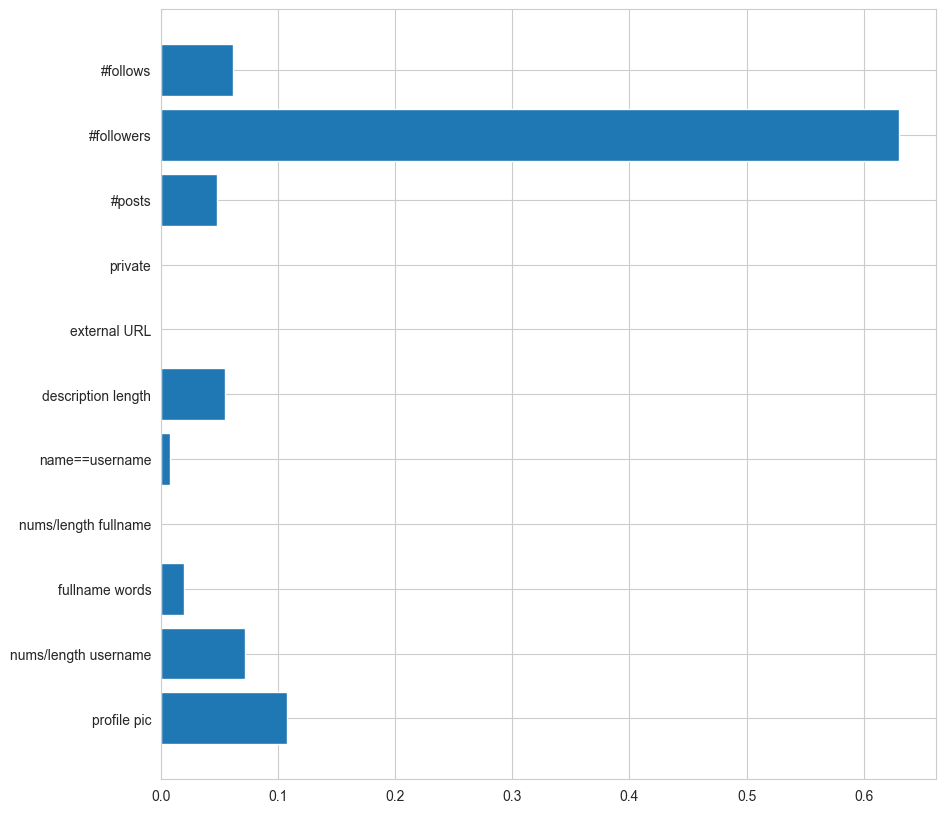

In [323]:
plt.figure(figsize=(10,10))
plt.barh(X_test.columns, model.feature_importances_)
plt.show()

In [326]:
# =========================
# 10. Save Model
# =========================
model_filename = "best_instagram_fake_spammer_model.pkl"
with open(model_filename, "wb") as f:
    pickle.dump(final_pipe, f)

print(f"\nModel saved successfully as {model_filename}")    



Model saved successfully as best_instagram_fake_spammer_model.pkl


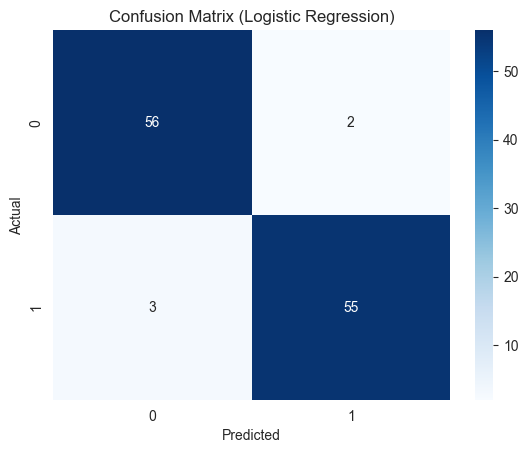

In [327]:
# =========================
# 11. Confusion Matrix Visualization
# =========================
y_pred_valid = final_pipe.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred_valid)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [328]:
# =========================
# 12. Summary
# =========================
print("\nModel comparison summary:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

print(f"\nFinal best model trained: {best_model_name}")
print("Model and predictions ready for deployment.")


Model comparison summary:
Logistic Regression: 0.9569
Random Forest: 0.9310
Gradient Boosting: 0.9224

Final best model trained: Logistic Regression
Model and predictions ready for deployment.
